<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# And now for something completely different

A one-hot regression example for those who need a break from neurons.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This is a neuroscience course, but to understand some of the concepts today lets turn to a classic statistics problem from ecology. This example is relevant to this course insofar as we are on and island, and it never hurts to think about some island ecology!


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Charles Darwin  observed that there are many species of finch unique to the Galapogos Islands. Importanlty, these finch appear very similar to those found on the mainland, but with unique specializations specific to their enviornmental niches on the islands. From this, he concluded that the island were likely colonized by birds from the mainland, and over time the bird population on the island adapted to fit the local environment. This was one of the key insigts leading to his theory of evolution.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


The finches of the Galapogos have remained an active area of study. From 1973 to 2013, Peter and Rosemary Grand made trips to the island of Daphne Major to collect beak size and shape information about two species of finch, G. Fortis and G. scandens. We will use the distinction between these species to illustrate catigorical regression- a concept that will be useful momentarily when we start thinging about neural encoding. If you are interested, more information on these data are avalible here: https://www.kaggle.com/datasets/crbelhekar619/darwins-finches-evolution-dataset


![Illustration by Rosa Marin Ribas, http://graphictextile.blogspot.com/2017/08/two-finches.html?spref=pi](../../../resources/geospizas.jpg)

In [77]:
# Get all our favorite libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
%matplotlib inline

For this example, lets start with data collected in 1975. 

Length and depth units are in mm

In [78]:
finches = pd.read_csv(r'../../resources/finch_beaks.csv')
finches.head()

,band,year,species,beaklength,beakdepth
0,2,1975,fortis,9.4,8.0
1,9,1975,fortis,9.2,8.3
2,12,1975,fortis,9.5,7.5
3,15,1975,fortis,9.5,8.0
4,305,1975,fortis,11.5,9.9


In [79]:
finches.tail()

,band,year,species,beaklength,beakdepth
646,21295,2012,scandens,14.2,9.3
647,21297,2012,scandens,13.0,9.8
648,21340,2012,scandens,14.6,8.9
649,21342,2012,scandens,13.1,9.8
650,21347,2012,scandens,15.2,9.1


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>


Lets start by choosing one year's worth of finches to analyze. Make a dataframe called `finches75` that slices the `finches` data frame for the year 1975.

In [80]:
finches75 = finches[finches.year==1975]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

What species of finches are in this dataset?


In [81]:
np.unique(finches75['species'])

array(['fortis', 'scandens'], dtype=object)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>

# Step One is always to look at your data.

use the `matplotlib.hist` function to plot histograms of the distribution of beak length in the year 1975 for each of the two finch species in the dataset.

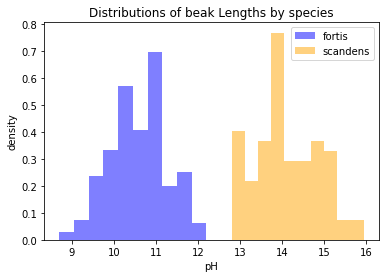

In [82]:
fig,ax = plt.subplots()
ax.hist(finches75[finches75.species=='fortis'].beaklength,density = True,alpha = .5,histtype='bar',label='fortis',color = 'blue');
ax.hist(finches75[finches75.species=='scandens'].beaklength,density = True,alpha = .5,histtype='bar',label='scandens',color = 'orange');
ax.set_ylabel('density')
ax.set_xlabel('pH')
ax.legend()
ax.set_title('Distributions of beak Lengths by species');


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Now, lets say that we want to model beak length as a function of finch species. Another way of saying that is "Lets ask if Beak Length is encoded by species information." Perhapse the simplest model we could build would look like this:

$$y = \beta x+C$$

Here, $y$ is our beak length and $X$ is species information. $\beta$ and $C$ are constants.

In this case, however, X is not a continuous variable- really, X has two possible values that are not numeric- fortis or scandens.

One way to handle this would be to construct two models:
$$y = \beta_f X_f+C_f$$
$$y = \beta_s X_s+C_s$$

Mathematically, though, this is a pain - now we need to look up which equation to use every time we want to predict new data. Much easier would be to do things peicewise.

$$y = \begin{cases} 
\beta_f X & is & f  \\
\beta_s X & is & s
\end{cases} + C $$

Notice that, in this formulation, we merged the constants into one value, $C$. $C$ is, effectivly, the offset from zero for any model we fit. In this example, for interpratibility, we are actually going to enforce $C=0$ so that the $\beta$ values we get are easier to understand. We will come back to why merging all the constants makes sense for modeling neurons and tuning curves later later.

Importantly, $X$ here is just the identity of the bird species - it is therefore, always 1! What changes is whether We are operating in the $f$ or $s$ part of the equation. This type of problem is called "One-Hot" encoding, because X encodes what art of the equation we are operating in. Mathematically, we do this by creating a vector for each sample and setting $X_i = 1$ for whichever case is true. 

$$ X_f = [1,0] $$
$$ X_s = [0,1] $$ 

If we have many observations, we can stack each of these X obeservations to form a "Design Matrix." 

We will have a corresponding fitting parameter vector, $$\beta = [\beta_f,\beta_s]$$

Our whole problem can now be written: 
$$y = \beta X$$ 


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>
Convert the beak length data to be a one-hot regression problem.

You will have two variables: `X75`, which will be the have two columns indicating the species of the measured bird, and `y75` indicating the beak length of each finch

Get `X75`

In [83]:

its_a_fortis = np.array(finches75.species == 'fortis')
its_a_scandens = np.array(finches75.species=='scandens')
X75 = np.vstack([its_a_fortis,its_a_scandens]).T
X75 = X75.astype(int)

and get `y75`

In [84]:
y75 = finches75.beaklength

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

Now that we have $X$ and $y$, we need to solve for $\beta$. 

You will recall from the workshop that we fit a linear model by mimizing the error function:

$$E = \frac{1}{2} \sum_i \left | y_i - f\left ( \vec{x}_i \right ) \right |^2 = \frac{1}{2} \sum_i \left | y_i - \sum_j \beta_j X_i \right |^2 $$

There, we eluded to a closed form solution to this problem. If you sit down with a pencil and paper (or read enough wikipedia: https://en.wikipedia.org/wiki/Ordinary_least_squares). You can show that the values of beta that minimize this function will be given:

$$ \vec{\beta} = (X^TX)^{-1}X^Ty$$

Let try it! Here is one notation:

In [85]:
beta = np.linalg.inv(X75.T@X75) @ X75.T @ y75
print(beta)

[10.56518987 14.12091954]


And here is an alternative notation

In [86]:
beta = np.linalg.lstsq(X75,y75,rcond=0)[0]
print(beta)

[10.56518987 14.12091954]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Manually doing linear algebra, however, is not the easiest way to tackle this sort of problem in python. As you know from this mornings workshop, `Scikit-learn` provides an excellent interface to tackling this problem. 


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Create a `LinearModel` object and fit it to the data.  

In [87]:
LinearModel = lm.LinearRegression(fit_intercept=False) # No C here!

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Now,use your object to fit the data

In [88]:
LinearModel.fit(X75,y75)

LinearRegression(fit_intercept=False)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

And finally, confirm that the coefficients match those we computed using the closed form solution above.

In [89]:
LinearModel.coef_

array([10.56518987, 14.12091954])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Linear regression is built on the assumption that data will be normally distributed around the mean of your model output. To see this explicitly, we can can use our model to predict the beak size for each type of finch. To do this, we need to create a 'fake' `X` matrix with the same one-hot encoding we used to train the model. For *fortis*, this will look like



In [90]:
fortis = np.array([1,0])
prediction_fortis = LinearModel.predict(fortis.reshape(1, -1))
prediction_fortis


array([10.56518987])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Predict the beak length for the scandens species in 1975:

In [91]:
scandens = np.array([0,1])
prediction_scandens = LinearModel.predict(scandens.reshape(1, -1))
prediction_scandens

array([14.12091954])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Is the assumption of normality a good one? You should be able to get a good idea by looking at the distributions of beak lengths you plotted above. 

Alternatively, you can plot the residuals for your model- this is more useful when the data are less clearly catigorized. 

Try plotting the residuals for your model. 

To do this, you can either use `prediction75 = LinearModel.predict(X75)` and subtract this from `y75`, or simply access `LinearModel.residues_`

In [92]:
prediction75 = LinearModel.predict(X75)

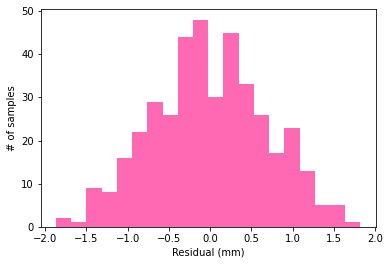

In [93]:
fig,ax = plt.subplots()
ax.hist(y75-prediction75,20,histtype='bar',color = 'hotpink');
ax.set_ylabel('# of samples')
ax.set_xlabel('Residual (mm)');


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
How much of the variance did our model explain? Use `score` to see the $R^2$

In [94]:
LinearModel.score(X75,y75)

0.8184106108215392

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">


But is this really a fair analysis? Try using `train_test_split` (or KFold cross validation) to split your data. If you plot the residuals, are they still distributed around zero? What does this tell you?

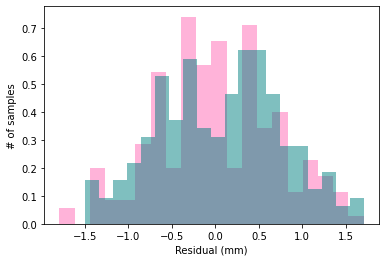

In [95]:
# Split the data in half
train_X75,test_X75,train_y75,test_y75 = train_test_split(X75,y75,test_size = .5,random_state = 42)

LinearModel = lm.LinearRegression(fit_intercept=False)
LinearModel.fit(train_X75,train_y75)

trainprediction75 = LinearModel.predict(train_X75)
testprediction75 = LinearModel.predict(test_X75)

fig,ax = plt.subplots()
ax.hist(train_y75-trainprediction75,20,alpha = .5,density = True,histtype='bar',label='Train Residuals',color = 'hotpink')
ax.hist(test_y75-testprediction75,20,alpha = .5,density = True,histtype='bar',label='Test Residuals',color = 'teal');
ax.set_ylabel('# of samples')
ax.set_xlabel('Residual (mm)');




In [96]:
LinearModel.score(test_X75,test_y75)

0.7959806695794851

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h2> Using the regression prediction to identify change </h2>
    
Now that we have a model that works well for the year 1975, lets try applying it to the data collected at a different timepoint to see if it still provides a good prediction.
    

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Filter the finches table for data from 2012

In [97]:
finches12 = finches[finches.year==2012]
finches12.head()

,band,year,species,beaklength,beakdepth
403,19022,2012,fortis,10.0,8.5
404,19028,2012,fortis,12.5,8.9
405,19032,2012,fortis,9.3,7.5
406,19041,2012,fortis,10.3,9.6
407,19044,2012,fortis,11.0,9.2


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Plot the data from 2012 overlayed on the 1975 data, seperated by species. Do we think things changed?

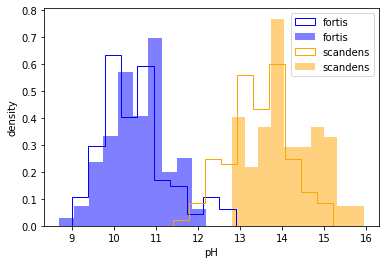

In [98]:
fig,ax = plt.subplots()
ax.hist(finches12[finches12.species=='fortis'].beaklength,density = True,histtype='step',label='fortis',color = 'blue');
ax.hist(finches75[finches75.species=='fortis'].beaklength,density = True,histtype='bar',alpha = .5,label='fortis',color = 'blue');

ax.hist(finches12[finches12.species=='scandens'].beaklength,density = True,histtype='step',label='scandens',color = 'orange');
ax.hist(finches75[finches75.species=='scandens'].beaklength,density = True,histtype='bar',alpha = .5,label='scandens',color = 'orange');

ax.set_ylabel('density')
ax.set_xlabel('pH')
ax.legend()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Build a design matrix `X12` and beak lenght vector `y12` for these data

In [99]:
its_a_fortis = np.array(finches12.species == 'fortis')
its_a_scandens = np.array(finches12.species=='scandens')
X12 = np.vstack([its_a_fortis,its_a_scandens]).T
X12 = X12.astype(int)
y12 = finches12.beaklength

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Use the model we trained before to predict the new data. How did we do this time? Is it what you expected from the histograms you just plotted?

In [100]:
LinearModel.score(X12,y12)

0.6569924194886112

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
To get more of an intuition for how this model is working, you can also try plotting the residuals for this 1975 model in predicting 2012 data. Are they still centered at 0?

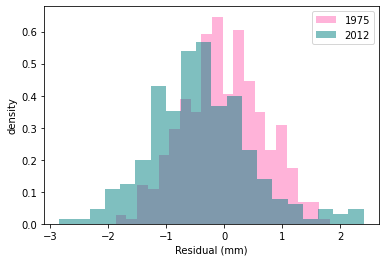

In [101]:
prediction12 = LinearModel.predict(X12)
fig,ax = plt.subplots()
ax.hist(y75-prediction75,20,alpha = .5,color = 'hotpink',label = '1975',density = True)
ax.hist(y12-prediction12,20,alpha = .5,color = 'teal',label = '2012',density=True)
ax.legend()
ax.set_xlabel('Residual (mm)')
ax.set_ylabel('density');

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

This is exciting - A model fit on 1975 data does less well at predicting 2012 data than it does on held-out 1975 data. This suggests that between 1975 and 2012, the beak size of the finch species changes. It show that, even in a small timespan, physical feature of the finch species evolve! Amazing things can happen if you spend some time on an island.